#### This function enables display ofimage files in a directory
#### The call is of the form
####  row_col_plot(img_path,rows, columns, fig_width, fig_height, img_height, img_width, title_color, title_size) where:
#### img_path is the full path to the location of the image files
#### rows is an integer specifying the number of rows in the display
#### columns is an integer specifying the number of columns in the display
#### fig_width is an integer specifying the width of the display
#### fig_height is an integer specifying the height of the display
#### title_color is the code for the color of the titles above the images
####   must be one of 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#### title_size is an integer specifying the pixel size of the titles
#### Note: image titles are extracted based on the file name of the image

#### Import required modules

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def row_col_plot(img_path,rows, columns, fig_width, fig_height, img_height, img_width, title_color, title_size):
    color_list=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    if title_color not in color_list:
        print ('the color you specified ', title_color, ' is not valid, defaulting to yellow')
        title_color='y' 'select yellow as default title color'
    fig = plt.figure(figsize=( fig_width, fig_height)) # set figure height and width
    img_list=sorted(os.listdir(img_path)) # get the list of file names and sort in alphanumeric order
    length=len(img_list)  # determine the number of image files
    available_length = rows * columns  # determine how many images can be accomadated
    if length> available_length:
        print(' Only ', available_length,' images of the ', length, ' image files can be displayed')
    for row in range(rows):
        for column in range(columns): # iterate through the columns
            i= row * columns + column  # calculate the subplot index          
            if i>length-1:
                print('only {0} images were available to show'.format(length))
                return False
            file=img_list[i]   # select the i th file        
            path_to_img=os.path.join(img_path, file) # path to the file
            img = Image.open(path_to_img)
            size=(img_width, img_height) 
            img = img.resize(size) # reize the image
            a = fig.add_subplot(rows, columns, i+1) # add the image to the display
            imgplot=plt.imshow(img)
            a.set_title(file, color=title_color, fontsize=title_size) # set the image title
            a.axis('off') # turn off showing axis values
    return 

#### Example of use

 Only  6  images of the  130  image files can be displayed


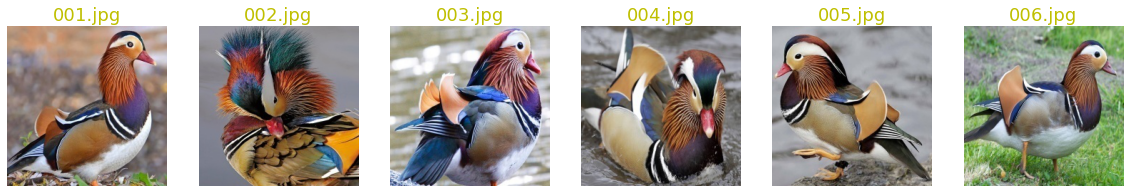

In [3]:
rows=1
columns=6
fig_height=100
fig_width=20
img_height=224
img_width=224
img_path=r'c:\Temp\birds\train\MANDRIN DUCK'
title_color='y'
title_size=18
status=row_col_plot(img_path,rows, columns, fig_width, fig_height, img_height, img_width, title_color, title_size)


#### The function below automates selection of display parameters based on the number of images specified

In [11]:
def auto_plot(img_path,no_of_images_to_show, title_color):
    color_list=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    if title_color not in color_list:
        print ('the color you specified ', title_color, ' is not valid, defaulting to yellow')
        title_color='y' 'select yellow as default title color'
    n=no_of_images_to_show
    img_list=sorted(os.listdir(img_path))
    total_width=0
    total_height=0
    max_length=0
    for i in range(n):
        f = img_list[i]
        image_path=os.path.join(img_path, f)
        img = Image.open(image_path)
        width, height=img.size
        total_width=total_width + width
        total_height=total_height + height
        if len(f)> max_length:
            max_length=len(f)
    ave_height=total_height//n
    ave_width=total_width//n
    aspect_ratio=ave_height/ave_width
    columns=6
    rows=n//columns + 1
    img_height=250
    fig_width=20
    font_size=int(fig_width*7/max_length)
    fig_height=int(rows * aspect_ratio * 3.5)
    print (fig_width, fig_height)
    fig = plt.figure(figsize=( fig_width, fig_height))
    fig.tight_layout()
    for row in range(rows):
        for column in range(columns): # iterate through the columns
            i= row * columns + column  # calculate the subplot index 
            if i+1>n:
                break
            file=img_list[i]   # select the i th file        
            path_to_img=os.path.join(img_path, file) # path to the file
            img = Image.open(path_to_img)
            width, height=img.size
            img_width=int(img_height* width/height)
            size=(img_width, img_height) 
            img = img.resize(size) # reize the image
            a = fig.add_subplot(rows, columns, i+1) # add the image to the display
            imgplot=plt.imshow(img)
            a.set_title(file, color=title_color, fontsize=font_size) # set the image title
            a.axis('off') # turn off showing axis values
            

#### Example of use

20 15


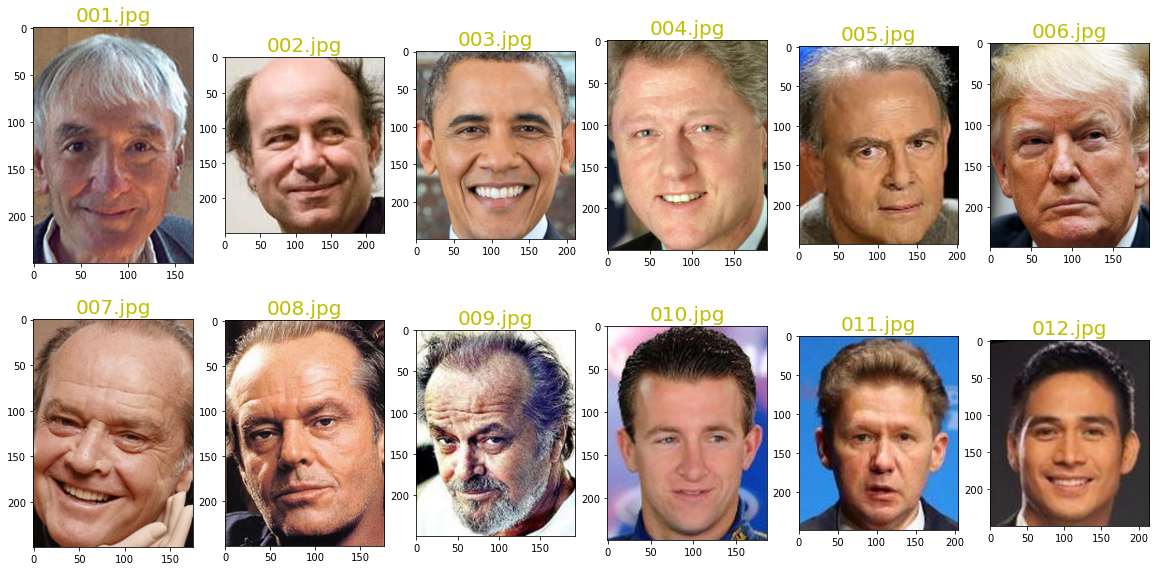

In [10]:
img_path=r'c:\Temp\people\test\savory'
auto_plot(img_path, 12, 'y')       
   